In [2]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\Sahanar\Downloads\Inventory Dataset.csv"
df = pd.read_csv(file_path)

# Display the first few rows to understand the structure
df.head()


,Product Name,Category,Manufacturer,Model / Drug Code,Serial / Batch Number,Warehouse Location,Stock Quantity,Wholesale Price,Retail Price,Supplier,Regulatory Approval,Expiry Date,Additional Info
0,Paracetamol,Drug,Johnson & Johnson,D-8942,783F01D9-91D,Barryshire,1711,3280.83,6371.89,Johnson PLC,CE,12/31/2027,"Form: Ointment, Active Ingredient: Atorvastati..."
1,Amoxicillin,Drug,GlaxoSmithKline,D-4019,3CDCF139-3B8,Robertshaven,1763,7859.59,17342.30,Ward Group,FCC,3/14/2026,"Form: Tablet, Active Ingredient: Amoxicillin, ..."
2,MRI Scanner,Medical Equipment,Siemens Healthineers,M-2186,B25BFD69-681,Courtneyton,23,8274.55,19694.80,Carson-Bryan,UL Certified,3/13/2028,"Usage: Emergency Care, Certification: TUV Cert..."
3,Smart Speaker,Hi-Tech Device,HP,T-2195,02BE4A20-7C8,New Virginiafurt,2580,3643.69,5480.14,Miller-Wilson,CE,NaN,"Processor: Apple M2, Storage: 1TB, Connectivit..."
4,Tablet,Hi-Tech Device,Lenovo,T-2381,D73A80B7-D1C,Lake Kathryn,4452,5794.08,11983.26,Gonzalez-Wheeler,UL Certified,NaN,"Processor: Exynos 2200, Storage: 1TB, Connecti..."


In [3]:
# Example 1: Identify products running low on stock (threshold set to 10 units)
low_stock_products = df[df['Stock Quantity'] < 10][['Product Name', 'Category', 'Stock Quantity', 'Warehouse Location']]

# Example 2: Calculate average wholesale and retail prices for hi-tech devices
hi_tech_data = df[df['Category'] == 'Hi-Tech Device']
average_wholesale_price = hi_tech_data['Wholesale Price'].mean()
average_retail_price = hi_tech_data['Retail Price'].mean()

# Example 3: Identify products with the highest profit margin
df['Profit Margin'] = df['Retail Price'] - df['Wholesale Price']
top_profit_products = df.nlargest(5, 'Profit Margin')[['Product Name', 'Profit Margin']]

# Example 4: Find drugs expiring within the next 3 months
df['Expiry Date'] = pd.to_datetime(df['Expiry Date'], errors='coerce')
from datetime import datetime, timedelta

current_date = datetime.now()
three_months_later = current_date + timedelta(days=90)
expiring_soon = df[(df['Expiry Date'] <= three_months_later) & (df['Category'] == 'Drug')][['Product Name', 'Expiry Date']]

# Example 5: Top suppliers with product count
top_suppliers = df['Supplier'].value_counts().head(3)

low_stock_products, average_wholesale_price, average_retail_price, top_profit_products, expiring_soon, top_suppliers


(Empty DataFrame
 Columns: [Product Name, Category, Stock Quantity, Warehouse Location]
 Index: [],
 5019.96940004771,
 9272.805639312977,
          Product Name  Profit Margin
 36487   Smart Speaker       14927.58
 40876  Gaming Console       14896.16
 23856      Omeprazole       14874.74
 66248   Smart Speaker       14873.79
 33556        Losartan       14859.05,
        Product Name Expiry Date
 22     Atorvastatin  2025-05-23
 36      Amoxicillin  2025-06-21
 39      Paracetamol  2025-06-01
 47       Omeprazole  2025-03-20
 64       Omeprazole  2025-04-03
 ...             ...         ...
 99863   Paracetamol  2025-05-31
 99882    Omeprazole  2025-06-19
 99954     Ibuprofen  2025-05-15
 99975  Atorvastatin  2025-06-08
 99984     Metformin  2025-06-19
 
 [3288 rows x 2 columns],
 Supplier
 Smith Group    133
 Smith PLC      130
 Smith Ltd      128
 Name: count, dtype: int64)

In [4]:
pip install numpy scikit-learn matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

# Assuming 'Stock Quantity' and a time-related feature like 'Expiry Date' are used
df['Expiry Date'] = pd.to_datetime(df['Expiry Date'], errors='coerce')
df['Days Until Expiry'] = (df['Expiry Date'] - pd.to_datetime('today')).dt.days

# Clean data
df = df.dropna(subset=['Days Until Expiry', 'Stock Quantity'])

# Train model
X = df[['Days Until Expiry']]
y = df['Stock Quantity']

model = LinearRegression()
model.fit(X, y)

# Predict future stock
future_days = np.array([[30], [60], [90]])
predicted_stock = model.predict(future_days)
print("Predicted Stock for next 30, 60, and 90 days:", predicted_stock)


Predicted Stock for next 30, 60, and 90 days: [2502.95513735 2503.30874809 2503.66235882]


C:\Users\Sahanar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [6]:
from sklearn.ensemble import IsolationForest

# Select relevant columns
data = df[['Stock Quantity', 'Wholesale Price', 'Retail Price']]

# Fit model
model = IsolationForest(contamination=0.05) # Adjust contamination based on expected anomaly rate
df['Anomaly'] = model.fit_predict(data)

# Identify anomalies
anomalies = df[df['Anomaly'] == -1]
print("Detected Anomalies:\n", anomalies[['Product Name', 'Stock Quantity', 'Wholesale Price']])


Detected Anomalies:
         Product Name  Stock Quantity  Wholesale Price
2        MRI Scanner              23          8274.55
19     X-Ray Machine            4826          9393.76
46     X-Ray Machine             433          8596.13
54     Defibrillator            1209           149.70
76        Omeprazole            2088            95.79
...              ...             ...              ...
99890  Infusion Pump            4852           110.40
99899      Ibuprofen            4675          9100.14
99929    Amoxicillin              16          9947.52
99962    MRI Scanner            3226          9970.57
99994       Losartan            4030          9851.72

[3324 rows x 3 columns]


In [7]:
def recommend_action(row):
    if row['Stock Quantity'] < 20:
        return 'Restock'
    elif row['Stock Quantity'] > 5000:
        return 'Consider Promotion'
    else:
        return 'Maintain'
    
df['Recommendation'] = df.apply(recommend_action, axis=1)
print(df[['Product Name', 'Stock Quantity', 'Recommendation']])


       Product Name  Stock Quantity Recommendation
0       Paracetamol            1711       Maintain
1       Amoxicillin            1763       Maintain
2       MRI Scanner              23       Maintain
5      Atorvastatin            2889       Maintain
7         Ibuprofen            2238       Maintain
...             ...             ...            ...
99994      Losartan            4030       Maintain
99996   MRI Scanner            1401       Maintain
99997   ECG Machine            1858       Maintain
99998    Omeprazole             665       Maintain
99999     Ibuprofen            1036       Maintain

[66464 rows x 3 columns]


In [8]:
# Step 1: Data Preprocessing

# Handling missing values by filling with appropriate values
df['Expiry Date'] = pd.to_datetime(df['Expiry Date'], errors='coerce')
df['Stock Quantity'].fillna(0, inplace=True)
df['Wholesale Price'].fillna(df['Wholesale Price'].mean(), inplace=True)
df['Retail Price'].fillna(df['Retail Price'].mean(), inplace=True)

# Calculate Days Until Expiry for forecasting
df['Days Until Expiry'] = (df['Expiry Date'] - pd.to_datetime('today')).dt.days
df['Days Until Expiry'].fillna(365, inplace=True)  # Assume 1 year for missing expiry dates

# Calculate Profit Margin
df['Profit Margin'] = df['Retail Price'] - df['Wholesale Price']

# Encode categorical variables using Label Encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in ['Category', 'Manufacturer', 'Supplier', 'Warehouse Location', 'Regulatory Approval']:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

# Final cleaned data sample
df.head()


C:\Users\Sahanar\AppData\Local\Temp\ipykernel_18872\3947292719.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Stock Quantity'].fillna(0, inplace=True)
C:\Users\Sahanar\AppData\Local\Temp\ipykernel_18872\3947292719.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

,Product Name,Category,Manufacturer,Model / Drug Code,Serial / Batch Number,Warehouse Location,Stock Quantity,Wholesale Price,Retail Price,Supplier,Regulatory Approval,Expiry Date,Additional Info,Profit Margin,Days Until Expiry,Anomaly,Recommendation
0,Paracetamol,0,5,D-8942,783F01D9-91D,948,1711,3280.83,6371.89,20737,0,2027-12-31,"Form: Ointment, Active Ingredient: Atorvastati...",3091.06,1010,1,Maintain
1,Amoxicillin,0,4,D-4019,3CDCF139-3B8,22495,1763,7859.59,17342.30,44261,1,2026-03-14,"Form: Tablet, Active Ingredient: Amoxicillin, ...",9482.71,353,1,Maintain
2,MRI Scanner,1,13,M-2186,B25BFD69-681,2954,23,8274.55,19694.80,6231,5,2028-03-13,"Usage: Emergency Care, Certification: TUV Cert...",11420.25,1083,-1,Maintain
5,Atorvastatin,0,8,D-7348,28C50049-7B7,13936,2889,7968.54,13931.09,3324,3,2026-02-09,"Form: Injection, Active Ingredient: Omeprazole...",5962.55,320,1,Maintain
7,Ibuprofen,0,10,D-9952,C3CED6E6-F0A,3779,2238,7560.16,11364.20,25488,1,2025-12-11,"Form: Capsule, Active Ingredient: Atorvastatin...",3804.04,260,1,Maintain


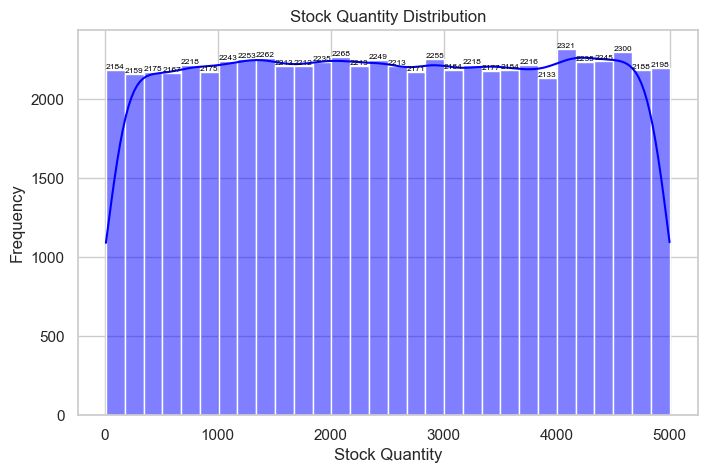

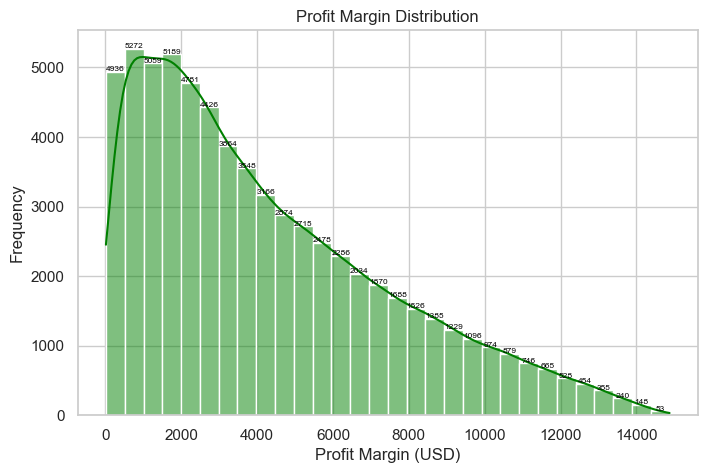

C:\Users\Sahanar\AppData\Local\Temp\ipykernel_18872\4213285678.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x='Category', data=expiring_soon, palette='Reds')


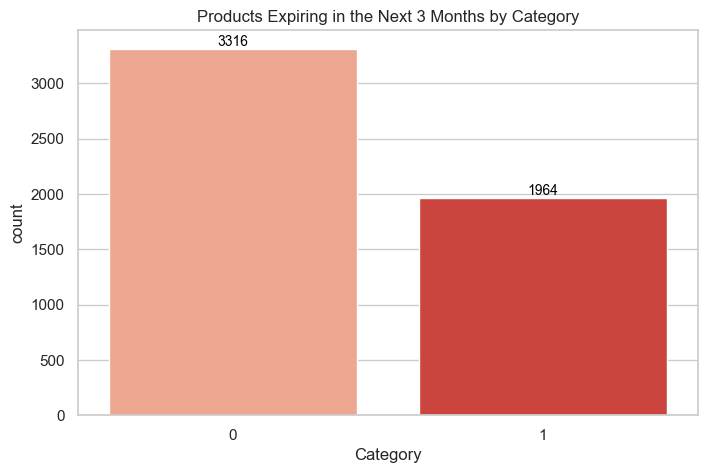

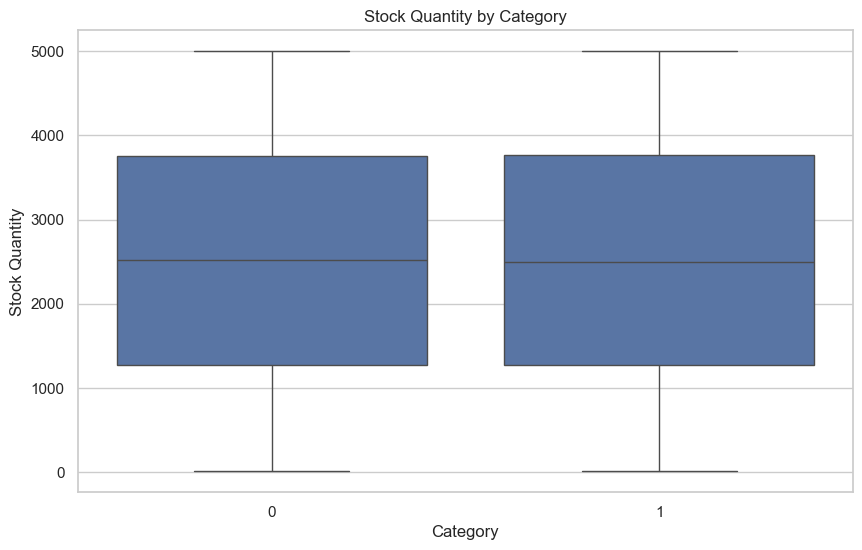

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Plot 1: Stock Quantity Distribution
plt.figure(figsize=(8, 5))
ax = sns.histplot(df['Stock Quantity'], bins=30, kde=True, color='blue')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=6, color='black')
plt.title('Stock Quantity Distribution')
plt.xlabel('Stock Quantity')
plt.ylabel('Frequency')
plt.show()

#plt.figure(figsize=(12, 6))
#ax = sns.barplot(x='Product Name', y='Stock Quantity', data=df, color='blue')

# Annotate the bars with data points
#for p in ax.patches:
    #ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                #ha='center', va='bottom', fontsize=10, color='black')

#plt.xticks(rotation=90)
#plt.title('Stock Quantity by Product')
#plt.xlabel('Product Name')
#plt.ylabel('Stock Quantity')
#plt.show()

# Plot 2: Profit Margin Distribution
plt.figure(figsize=(8, 5))
ax=sns.histplot(df['Profit Margin'], bins=30, kde=True, color='green')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=6, color='black')
plt.title('Profit Margin Distribution')
plt.xlabel('Profit Margin (USD)')
plt.ylabel('Frequency')
plt.show()

# Plot 3: Products Nearing Expiry
expiring_soon = df[df['Days Until Expiry'] <= 90]
plt.figure(figsize=(8, 5))
ax=sns.countplot(x='Category', data=expiring_soon, palette='Reds')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')
plt.title('Products Expiring in the Next 3 Months by Category')
#plt.xticks(rotation=0)
plt.show()

# Plot 4: Stock Quantity by Category
plt.figure(figsize=(10, 6))
ax=sns.boxplot(x='Category', y='Stock Quantity', data=df)
plt.title('Stock Quantity by Category')
#plt.xticks(rotation=45)
plt.show()




In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Features and Target for Forecasting
X = df[['Days Until Expiry', 'Wholesale Price', 'Retail Price']]
y = df['Stock Quantity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(2095130.4606366656, -0.00028040058934131196)

In [12]:
from sklearn.ensemble import IsolationForest

# Selecting relevant features for anomaly detection
anomaly_data = df[['Stock Quantity', 'Wholesale Price', 'Retail Price', 'Profit Margin']]

# Initialize and fit Isolation Forest
isolation_forest = IsolationForest(contamination=0.05, random_state=42)
df['Anomaly'] = isolation_forest.fit_predict(anomaly_data)

# Extract anomalies
anomalies = df[df['Anomaly'] == -1][['Product Name', 'Stock Quantity', 'Wholesale Price', 'Retail Price', 'Profit Margin']]
anomalies.head()


,Product Name,Stock Quantity,Wholesale Price,Retail Price,Profit Margin
2,MRI Scanner,23,8274.55,19694.80,11420.25
19,X-Ray Machine,4826,9393.76,21179.28,11785.52
46,X-Ray Machine,433,8596.13,21051.32,12455.19
91,Losartan,4730,9847.18,21992.48,12145.30
129,Omeprazole,4325,9997.93,22004.60,12006.67


In [13]:
# Function to generate recommendations based on stock, margin, and anomalies
def generate_recommendation(row):
    if row['Anomaly'] == -1:
        return 'Investigate Anomaly'
    elif row['Stock Quantity'] < 20:
        return 'Restock'
    elif row['Stock Quantity'] > 5000:
        return 'Consider Promotion'
    elif row['Profit Margin'] > 10000:
        return 'Prioritize Sales'
    else:
        return 'Maintain Stock'

# Apply the recommendation function
df['Recommendation'] = df.apply(generate_recommendation, axis=1)

# Display sample recommendations
df[['Product Name', 'Stock Quantity', 'Profit Margin', 'Anomaly', 'Recommendation']].head(10)


,Product Name,Stock Quantity,Profit Margin,Anomaly,Recommendation
0,Paracetamol,1711,3091.06,1,Maintain Stock
1,Amoxicillin,1763,9482.71,1,Maintain Stock
2,MRI Scanner,23,11420.25,-1,Investigate Anomaly
5,Atorvastatin,2889,5962.55,1,Maintain Stock
7,Ibuprofen,2238,3804.04,1,Maintain Stock
9,ECG Machine,3042,1766.41,1,Maintain Stock
10,Defibrillator,226,8050.95,1,Maintain Stock
11,X-Ray Machine,715,815.61,1,Maintain Stock
12,Amoxicillin,624,2770.75,1,Maintain Stock
13,MRI Scanner,117,3903.76,1,Maintain Stock


C:\Users\Sahanar\AppData\Local\Temp\ipykernel_18872\1491423085.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x='Recommendation', data=df, palette='viridis')


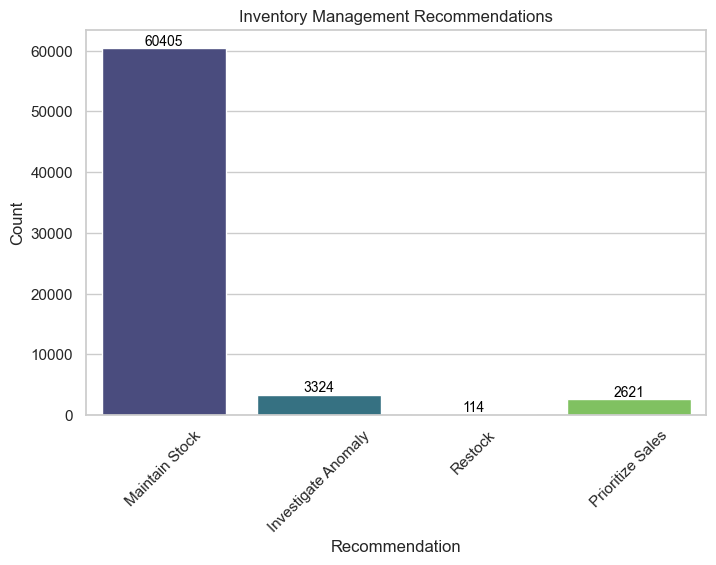

'C:\\Users\\Sahanar\\Downloads\\inventory_recommendations_report.csv'

In [14]:
# Visualization: Recommendation Distribution
plt.figure(figsize=(8, 5))
ax=sns.countplot(x='Recommendation', data=df, palette='viridis')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')
plt.title('Inventory Management Recommendations')
plt.xlabel('Recommendation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Exporting results to CSV
report_path = r'C:\Users\Sahanar\Downloads\inventory_recommendations_report.csv'
df[['Product Name', 'Stock Quantity', 'Profit Margin', 'Anomaly', 'Recommendation']].to_csv(report_path, index=False)
report_path


In [17]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pickle

# Load your dataset
df = pd.read_csv(r'C:\Users\Sahanar\Downloads\Inventory Dataset.csv')

# Convert Expiry Date and calculate Days Until Expiry
df['Expiry Date'] = pd.to_datetime(df['Expiry Date'], errors='coerce')
df['Days Until Expiry'] = (df['Expiry Date'] - pd.to_datetime('today')).dt.days
df = df.dropna(subset=['Days Until Expiry', 'Stock Quantity'])

# Train using only Days Until Expiry
X = df[['Days Until Expiry']]
y = df['Stock Quantity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [19]:
import pickle

# Save the model
with open('inventory_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Model saved as 'inventory_model.pkl'")


Model saved as 'inventory_model.pkl'


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r"C:\Users\Sahanar\Downloads\Inventory Dataset.csv")

In [3]:
# 1. Basic Information and Summary Statistics
print("\nBasic Information:")
df.info()
print("\nSummary Statistics:")
print(df.describe())



Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Product Name           100000 non-null  object 
 1   Category               100000 non-null  object 
 2   Manufacturer           100000 non-null  object 
 3   Model / Drug Code      100000 non-null  object 
 4   Serial / Batch Number  100000 non-null  object 
 5   Warehouse Location     100000 non-null  object 
 6   Stock Quantity         100000 non-null  int64  
 7   Wholesale Price        100000 non-null  float64
 8   Retail Price           100000 non-null  float64
 9   Supplier               100000 non-null  object 
 10  Regulatory Approval    100000 non-null  object 
 11  Expiry Date            66464 non-null   object 
 12  Additional Info        100000 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 9.9+ MB

Summary Sta

In [4]:
# 2. Handling Missing Data
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Product Name                 0
Category                     0
Manufacturer                 0
Model / Drug Code            0
Serial / Batch Number        0
Warehouse Location           0
Stock Quantity               0
Wholesale Price              0
Retail Price                 0
Supplier                     0
Regulatory Approval          0
Expiry Date              33536
Additional Info              0
dtype: int64


In [6]:
#Optionally fill or drop missing values
df = df.fillna(0)  # Replace missing values with 0

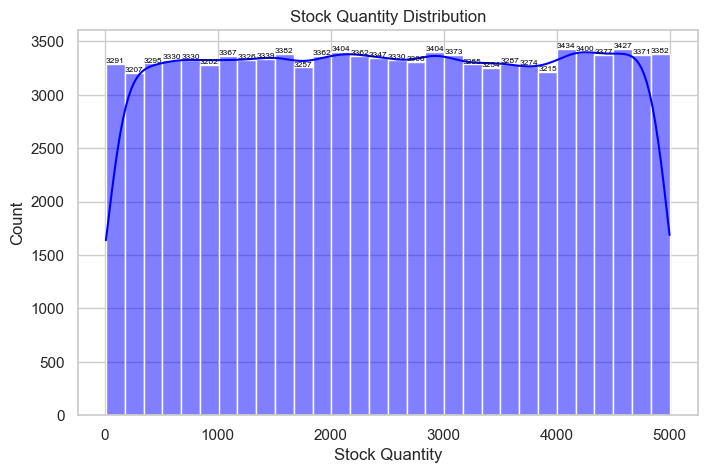

In [10]:
# 3. Visualizations
sns.set(style="whitegrid")

# Histogram of Stock Quantity
plt.figure(figsize=(8, 5))
ax=sns.histplot(df['Stock Quantity'],bins=30 ,kde=True, color='blue')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=6, color='black')
plt.title('Stock Quantity Distribution')
plt.show()

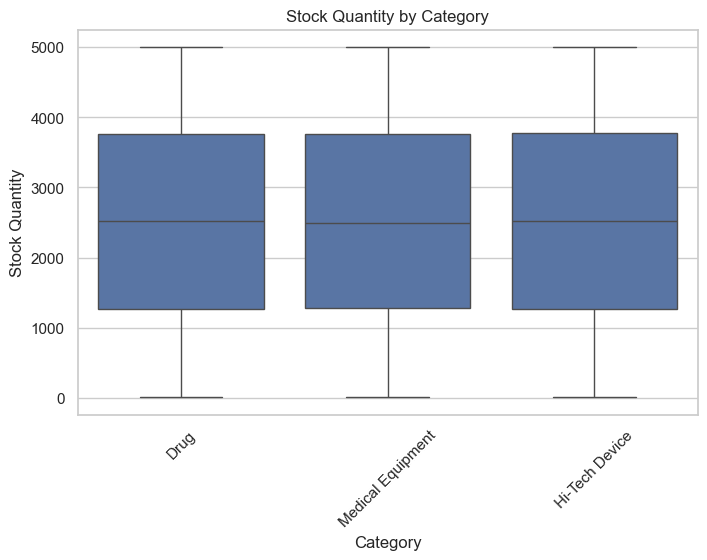

In [11]:
# Boxplot for detecting outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x='Category', y='Stock Quantity', data=df)
plt.title('Stock Quantity by Category')
plt.xticks(rotation=45)
plt.show()

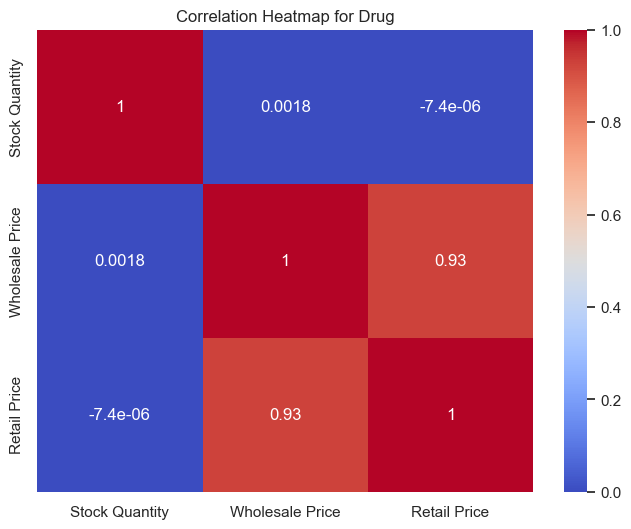

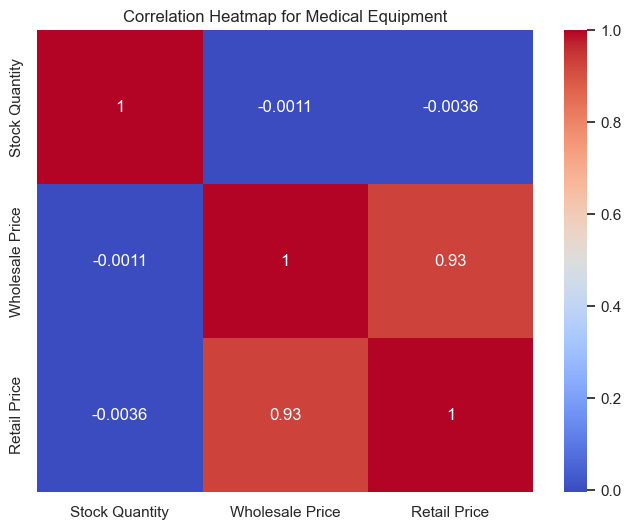

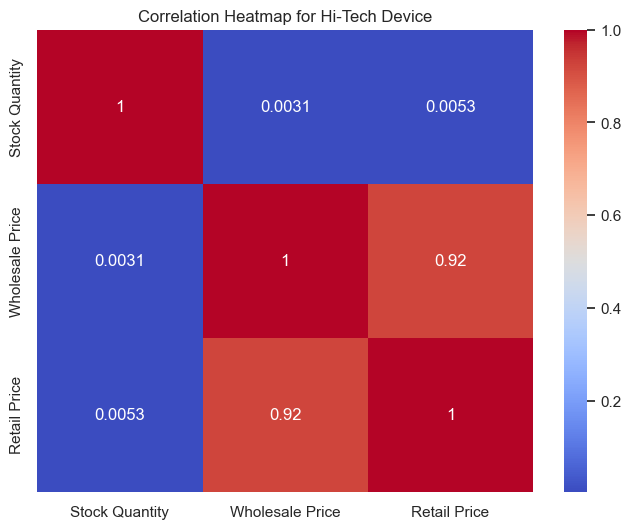

In [ ]:
# Assuming 'Category' is the column representing the product category
categories = df['Category'].unique()

for category in categories:
    plt.figure(figsize=(8, 6))
    category_data = df[df['Category'] == category].select_dtypes(include=['number'])
    
    if category_data.shape[1] > 1:
        sns.heatmap(category_data.corr(), annot=True, cmap='coolwarm')
        plt.title(f'Correlation Heatmap for {category}')
        plt.show()
    else:
        print(f"Not enough numeric data for {category} to generate a heatmap.")

